## Assignement 1

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib as plot
import scipy
import pystan
import arviz

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [3]:
print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          7.7    0.35   5.93  -3.16   4.56   7.81  11.13  18.42    294   1.01
tau        6.88     0.3   6.15   0.23   2.39   5.34   9.43  24.17    413   1.01
eta[1]     0.41    0.02   0.93  -1.56   -0.2   0.42   1.02    2.2   1805    1.0
eta[2]     0.03    0.02   0.86  -1.72   -0.5   0.04   0.57   1.71   1343    1.0
eta[3]    -0.18    0.02   0.99  -2.15   -0.9  -0.18   0.51   1.72   1972    1.0
eta[4]    -0.04    0.02    0.9  -1.94  -0.63  -0.02   0.58   1.68   1811    1.0
eta[5]    -0.34    0.02   0.87  -1.96  -0.92  -0.36   0.24   1.41   1468    1.0
eta[6]     -0.2    0.02   0.88  -1.95  -0.79   -0.2   0.38   1.47   1423    1.0
eta[7]     0.35    0.02   0.88  -1.44  -0.18   0.36   0.94   2.06   1952    1.0
eta[8]     0.

In [4]:
fit2 = sm.sampling(data=schools_dat, iter=10000, chains=4)

In [5]:
fit3 = sm.sampling(data=schools_dat, iter=10000, chains=4)

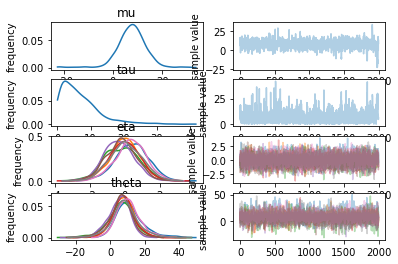

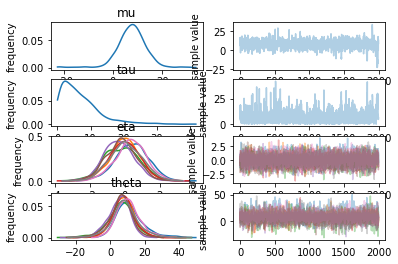

In [6]:
fit.plot()